# Prompted Bigraph-Builder Demo

In [1]:
from biosimulator_processes.biosimulator_builder import BiosimulatorBuilder, BuildPrompter

CobraProcess registered successfully.
CopasiProcess registered successfully.
SmoldynProcess registered successfully.
TelluriumProcess registered successfully.
DeterministicTimeCourseParameterScan registered successfully.


## The prompter workflow can be described in the following steps:

            1. Initialize the builder to use. We will use BiosimulatorBuilder for this repo.
            2. Initialize the prompter, passing at least the object generated from #1 and number of processes to add to the composite.
            3. The prompt will begin once the object from #2 is instanitated.

### 1. Initialize the builder

In [2]:
biosim_builder = BiosimulatorBuilder()  # TODO: Base OpenAPI spec for REST/swagger on the Builder: Perhaps a generalized Builder REST and BiosimBuilder REST?.
    

#### View the list of available processes (optional).

In [3]:
biosim_builder.list_processes()

['CopasiProcess',
 'SmoldynProcess',
 'DeterministicTimeCourseParameterScan',
 'TelluriumProcess',
 'CobraProcess',
 'console-emitter',
 'ram-emitter']

### 2. & 3. Instantiate the Build Prompter. The idea here is that there is a build prompter that uses references from a given Builder instance/implementation (in this case, BiosimulatorBuilder) to dynamically add registered processes to the bigraph. BuildPrompter exists as one of the classes in the highest-level BigraphBuilder API. Let's add a number of the same copasi processes to the composite as a simple way to start.

In [4]:
num = 1
duration = 100
arnold_poolman_biomodel_id = 'BIOMD0000000391'
hockin_1999 = 'BIOMD0000000365'

prompter = BuildPrompter(builder_instance=biosim_builder, num_additions=num)

New prompter instance created!


#### NOTE: Input kwargs can be generated by the prompter via both kwarg and prompt

In [5]:
input_kwargs = prompter.generate_input_kwargs(
    CopasiProcess={
        'model': {'model_source': arnold_poolman_biomodel_id}
    }
)

Input kwargs generated: {'CopasiProcess': {'model': {'model_source': 'BIOMD0000000391'}}}


Run request initiated...
5 processes will be added to the bi-graph.
All processes will be connected as well.
Input kwargs generated: {'CopasiProcess': {'model': {'model_source': 'BIOMD0000000391'}}}
CONFIG INPUT GOING IN: {'model': {'model_source': 'BIOMD0000000391'}}
simple1 process successfully added to the bi-graph!
All nodes including the most recently added simple1 processes connected!
Done adding single simple1 (CopasiProcess) to the bigraph.
Input kwargs generated: {'CopasiProcess': {'model': {'model_source': 'BIOMD0000000391'}}, 'model': {'model_source': 'BIOMD0000000365'}}
CONFIG INPUT GOING IN: {'model': {'model_source': 'BIOMD0000000391'}}
simple2 process successfully added to the bi-graph!
All nodes including the most recently added simple2 processes connected!
Done adding single simple2 (CopasiProcess) to the bigraph.
Input kwargs generated: {'CopasiProcess': {'model': {'model_source': 'BIOMD0000000391'}}}
CONFIG INPUT GOING IN: {'model': {'model_source': 'BIOMD0000000391'

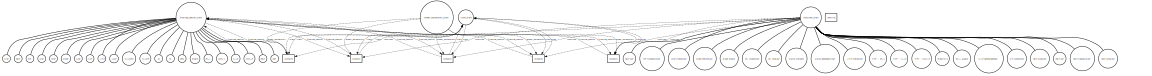

In [6]:
# add processes
prompter.start(**input_kwargs)

In [7]:
# run composition
prompter.run(num=num, duration=duration)

Error while running the simulation: >ERROR 2024-03-13T22:43:23<
  CCopasiTask (5): No output file defined for report of task 'Time-Course'.>EXCEPTION 2024-03-13T22:43:23<
  CTrajectoryMethod (25): Invalid state at time '0.010000'.


Generating composite...
Composite generated!
Running generated composite for an interval of 1


/Users/alex/Desktop/uchc_work/repos/biosimulator-processes/biosimulator_processes/processes/copasi_process.py:226: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

Error while running the simulation: >ERROR 2024-03-13T22:43:23<
  CCopasiTask (5): No output file defined for report of task 'Time-Course'.>EXCEPTION 2024-03-13T22:43:23<
  CTrajectoryMethod (25): Invalid state at time '0.010000'.
Error while running the simulation: >ERROR 2024-03-13T22:43:23<
  CCopasiTask (5): No output file defined for report of task 'Time-Course'.>EXCEPTION 2024-03-13T22:43:23<
  CTrajectoryMethod (25): Invalid state at time '0.010000'.
Error while running the simulation: >ERROR 2024-03-13T22:43:24<
  CCopasiTask (5): No output file defined for report of task 'Time-Course'.>EXCEPTION 2024-03-13T22:43:24<
  CTrajectoryMetho

Composite successfully run. Request complete. Done.


### Visualize the process composition

In [14]:
prompter.builder_instance.visualize();

In [9]:
# model={'model_source': {'value': 'BIOMD0000000391'}}, method='hybrid'

### Retrieve the composite document

In [10]:
# doc = b.document()
# doc

### save the document to file

In [11]:
# b.write(filename='toy_bigraph')

### load a composite from document
This document represents the full state of the composite, and so can reproduce the previous composite when loaded into a fresh Builder

In [12]:
# b2 = Builder(core=core, file_path='out/toy_bigraph.json')
# b2

In [13]:
# b2.visualize()